**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**AutoML**

*Edición 2021*

---

# INTEGRANTES:
*   María Belén Acotto
*   Juan Ignacio Barrionuevo Galtier
*   Gonzalo Heredia Edelstein

---

# Explicación

El dataset fue extraído del trabajo práctico de Análisis Supervisado, en donde se nos pedía implementar un modelo en el que se clasifique si un cliente de una empresa de viajes comprará o no un seguro de viajes de la misma empresa.

---

Features:
* **Customer**: Id del cliente. _Variable Categórica_.
* **Age**: Edad del cliente en cuestión. De entre los 25 a los 35 años en nuestro conjunto de Train. _Variable Numérica_.
* **EmploymentType**: El tipo de empleo. Dos tipos: Sector privado o autónomo y sector público. _Variable Categórica Discreta_.
* **GraduateOrNot**: Si son graduados universitarios o no. _Variable Categórica Discreta_.
* **AnnualIncome**: Ingleso anual en rupias indias. _Variable Numérica_.
* **FamilyMembers**: Cantidad de miembros en la familia. _Variable Numérica_.
* **ChronicDiseases**: Si el cliente padece alguna enfermedad o condición importante como diabetes/alta presión arterial o asma, etc. _Variable Numérica_.
* **FrequentFlyer**: Datos derivados basados en el historial del cliente. Indica si un cliente hizo una reserva de pasaje de avión en al menos 4 instancias diferentes en los últimos 2 años (2017-2019). _Variable Categórica Discreta_.
* **EverTravelledAbroad**: Indica si el cliente viajó o no al extranjero. _Variable Categórica Discreta_.

Target:
* **TravelInsurance**: Variable binaria que indica 1 (uno), si el cliente compró el paquete de seguro de viaje, o 0 (cero), si no lo hizo. Esto se basa en el año 2019.
---

# Objetivo

El objetivo de este trabajo práctico era implementar un algorítmo basado en árboles intentando mejorar el f1-score. \
Implementaremos AutoPytorch con su aplicación para clasificar, y veremos los resultados obtenidos.

---

## Importación de Librerías

In [52]:
from autoPyTorch.api.tabular_classification import TabularClassificationTask

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tabulate import tabulate
import math
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

## Análisis y Pre-Proceso

### Lectura del Dataset

In [15]:
df = pd.read_csv('./src/travel_insurance_prediction_train.csv')
test_df = pd.read_csv('./src/travel_insurance_prediction_test.csv')

### EDA

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer             1490 non-null   int64 
 1   Age                  1490 non-null   int64 
 2   Employment Type      1490 non-null   object
 3   GraduateOrNot        1490 non-null   object
 4   AnnualIncome         1490 non-null   int64 
 5   FamilyMembers        1490 non-null   int64 
 6   ChronicDiseases      1490 non-null   int64 
 7   FrequentFlyer        1490 non-null   object
 8   EverTravelledAbroad  1490 non-null   object
 9   TravelInsurance      1490 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 116.5+ KB


In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer             497 non-null    int64 
 1   Age                  497 non-null    int64 
 2   Employment Type      497 non-null    object
 3   GraduateOrNot        497 non-null    object
 4   AnnualIncome         497 non-null    int64 
 5   FamilyMembers        497 non-null    int64 
 6   ChronicDiseases      497 non-null    int64 
 7   FrequentFlyer        497 non-null    object
 8   EverTravelledAbroad  497 non-null    object
dtypes: int64(5), object(4)
memory usage: 35.1+ KB


In [18]:
df.describe()

,Customer,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1490.000000,1490.000000,1.490000e+03,1490.000000,1490.000000,1490.000000
mean,745.500000,29.667114,9.278188e+05,4.777181,0.275839,0.357047
std,430.270264,2.880994,3.811715e+05,1.640248,0.447086,0.479290
min,1.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,373.250000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,745.500000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1117.750000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1490.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [19]:
test_df.describe()

,Customer,Age,AnnualIncome,FamilyMembers,ChronicDiseases
count,497.000000,497.000000,4.970000e+02,497.00000,497.000000
mean,1739.000000,29.599598,9.475855e+05,4.68008,0.283702
std,143.615807,3.010506,3.635818e+05,1.51347,0.451248
min,1491.000000,25.000000,3.000000e+05,2.00000,0.000000
25%,1615.000000,28.000000,6.500000e+05,4.00000,0.000000
50%,1739.000000,29.000000,9.500000e+05,4.00000,0.000000
75%,1863.000000,32.000000,1.250000e+06,6.00000,1.000000
max,1987.000000,35.000000,1.750000e+06,9.00000,1.000000


In [20]:
df = df.rename(columns={'Employment Type': 'EmploymentType'})
test_df = test_df.rename(columns={'Employment Type': 'EmploymentType'})

In [21]:
cat_ftrs = df.select_dtypes(include = "object").columns.values #Tomamos aquellas columnas categóricas
num_ftrs = df.iloc[:, 1:-1].columns.values[~np.isin(df.iloc[:, 1:-1].columns.values, cat_ftrs)] #Tomamos aquellas columnas numéricas sin el Id y el Target

for col in cat_ftrs:
    print(f'{col}: {df[col].unique()}')

EmploymentType: ['Private Sector/Self Employed' 'Government Sector']
GraduateOrNot: ['Yes' 'No']
FrequentFlyer: ['No' 'Yes']
EverTravelledAbroad: ['No' 'Yes']


### Features

Como primera instancia, tenemos la variable **Customer**, la cual es un id, por lo que directamente sacaremos del análisis.

In [22]:
df_ti = df.drop(columns=['Customer'])
test_df_ti = test_df.drop(columns=['Customer'])

#### Features Categóricas

Como analizamos, las variables categóricas tienen valores que se los puede considerar binarias, por lo que trataremos las mismas con una codificación aplicando LabelEncoder. Esto hará que se conserve una sola columna de dos valores: 0 y 1. Al aplicar esta técnica, disminuímos el riesgo de agregar ruido a nuestros datos.

In [23]:
for feat in cat_ftrs:
    df_ti[feat] = LabelEncoder().fit_transform(df_ti[feat].astype(str))

print (df_ti.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  1490 non-null   int64
 1   EmploymentType       1490 non-null   int64
 2   GraduateOrNot        1490 non-null   int64
 3   AnnualIncome         1490 non-null   int64
 4   FamilyMembers        1490 non-null   int64
 5   ChronicDiseases      1490 non-null   int64
 6   FrequentFlyer        1490 non-null   int64
 7   EverTravelledAbroad  1490 non-null   int64
 8   TravelInsurance      1490 non-null   int64
dtypes: int64(9)
memory usage: 104.9 KB
None


In [15]:
df_ti.describe()

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1490.000000,1490.000000,1490.000000,1.490000e+03,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000
mean,29.667114,0.709396,0.851007,9.278188e+05,4.777181,0.275839,0.212752,0.193289,0.357047
std,2.880994,0.454194,0.356201,3.811715e+05,1.640248,0.447086,0.409391,0.395010,0.479290
min,25.000000,0.000000,0.000000,3.000000e+05,2.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,0.000000,1.000000,6.000000e+05,4.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,1.000000,1.000000,9.000000e+05,5.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,1.000000,1.000000,1.250000e+06,6.000000,1.000000,0.000000,0.000000,1.000000
max,35.000000,1.000000,1.000000,1.800000e+06,9.000000,1.000000,1.000000,1.000000,1.000000


Conclusión de Encoder:
* **EmploymentType**: {1: Private Sector/Self Employed, 0: Government Sector}
* **GraduateOrNot**: {1: Yes, 0: No}
* **FrequentFlyer**: {1: Yes, 0: No}
* **EverTravelledAbroad**: {1: Yes, 0: No}

In [16]:
for col in cat_ftrs:
    print(col)
    print(df_ti[col].value_counts(normalize=True)*100)
    print('---')

EmploymentType
1    70.939597
0    29.060403
Name: EmploymentType, dtype: float64
---
GraduateOrNot
1    85.100671
0    14.899329
Name: GraduateOrNot, dtype: float64
---
FrequentFlyer
0    78.724832
1    21.275168
Name: FrequentFlyer, dtype: float64
---
EverTravelledAbroad
0    80.671141
1    19.328859
Name: EverTravelledAbroad, dtype: float64
---


Conclusión de estas variables:
* **EmploymentType**: Tenemos un 70% de clientes que trabajan en el sector privado.
* **GraduateOrNot**: Son en su mayoría universitarios los clientes de esta empresa, considerando un 85% de ellos.
* **FrequentFlyer**: Podemos observar que la gran mayoría son viajantes frecuentes.
* **EverTravelledAbroad**: El 80% de los clientes han viajado al extranjero.

Aplicamos LabelEncoder a Test

In [26]:
for feat in cat_ftrs:
    test_df_ti[feat] = LabelEncoder().fit_transform(test_df_ti[feat].astype(str))

print (test_df_ti.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  497 non-null    int64
 1   EmploymentType       497 non-null    int64
 2   GraduateOrNot        497 non-null    int64
 3   AnnualIncome         497 non-null    int64
 4   FamilyMembers        497 non-null    int64
 5   ChronicDiseases      497 non-null    int64
 6   FrequentFlyer        497 non-null    int64
 7   EverTravelledAbroad  497 non-null    int64
dtypes: int64(8)
memory usage: 31.2 KB
None


#### Features Numéricas

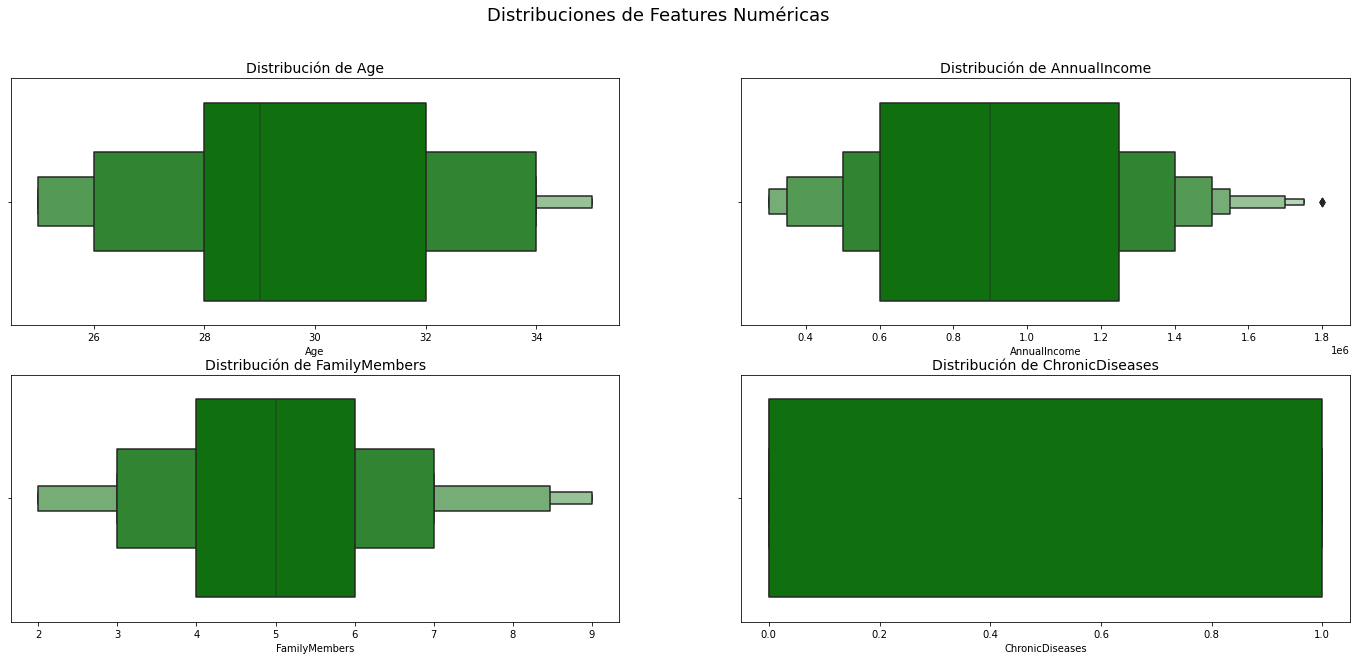

In [27]:
n_rows = 2
n_cols = 2
count = 0
fig, ax = plt.subplots(n_rows, n_cols, figsize=(24,10))
for i in num_ftrs:
    row = math.floor(count / n_cols)
    col = count % n_cols
    axes = ax[row, col]
    sns.boxenplot(data=df_ti, x=i, color='green', ax=axes)
    axes.set_title(f'Distribución de {i}', fontsize=14)
    count += 1
fig.suptitle('Distribuciones de Features Numéricas', fontsize=18)
plt.show()

• Age

In [28]:
df_ti.Age.value_counts()

28    371
34    194
31    177
29    148
33    119
26    108
27    105
25    103
32     73
30     52
35     40
Name: Age, dtype: int64

• FamilyMembers

In [29]:
df_ti.FamilyMembers.value_counts()

4    361
5    322
3    291
6    216
7    138
2     69
9     47
8     46
Name: FamilyMembers, dtype: int64

• AnnualIncome

In [30]:
df_ti[df_ti.AnnualIncome<650000].AnnualIncome.value_counts()

500000    106
600000     76
300000     68
550000     60
400000     53
350000     48
450000     11
Name: AnnualIncome, dtype: int64

In [31]:
df_ti[df_ti.AnnualIncome>1300000].AnnualIncome.value_counts()

1400000    96
1500000    64
1350000    33
1700000    27
1450000    25
1750000    12
1550000     5
1800000     4
1650000     1
Name: AnnualIncome, dtype: int64

In [32]:
df_ti[df_ti.AnnualIncome==1800000]

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
611,25,1,1,1800000,6,1,1,0,1
902,25,1,1,1800000,4,1,1,0,1
1132,25,1,1,1800000,7,1,1,0,1
1258,25,1,1,1800000,6,0,1,0,1


• ChronicDiseases

In [33]:
df_ti.ChronicDiseases.value_counts(normalize=True)*100

0    72.416107
1    27.583893
Name: ChronicDiseases, dtype: float64

In [34]:
df_ti[df_ti.ChronicDiseases==1].describe()

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,411.000000,411.000000,411.000000,4.110000e+02,411.000000,411.0,411.000000,411.000000,411.000000
mean,29.705596,0.712895,0.858881,9.300487e+05,4.829684,1.0,0.187348,0.209246,0.372263
std,2.887051,0.452962,0.348569,3.824867e+05,1.654320,0.0,0.390666,0.407266,0.483997
min,25.000000,0.000000,0.000000,3.000000e+05,2.000000,1.0,0.000000,0.000000,0.000000
25%,28.000000,0.000000,1.000000,6.000000e+05,4.000000,1.0,0.000000,0.000000,0.000000
50%,29.000000,1.000000,1.000000,9.000000e+05,5.000000,1.0,0.000000,0.000000,0.000000
75%,32.000000,1.000000,1.000000,1.200000e+06,6.000000,1.0,0.000000,0.000000,1.000000
max,35.000000,1.000000,1.000000,1.800000e+06,9.000000,1.0,1.000000,1.000000,1.000000


In [35]:
df_ti[df_ti.ChronicDiseases==1].TravelInsurance.value_counts(normalize=True)*100

0    62.773723
1    37.226277
Name: TravelInsurance, dtype: float64

---
* Es llamativo que, entre las personas que padecen enfermedades, menos del 40% compró un seguro de viaje. Aquí podemos suponer muchas cosas, como sesgo a la hora de tomar los datos, ya que esas personas pueden tener seguro externo contratado.

* Se planteó agrupar los montos anuales y hacer una variable categórica por rangos, pero se prefirió usarla del modo en como venía para conservar cierta diversidad en los datos.

* Se tomó la decisión de no sacar los outliers por:
    * La cantidad de datos es reducida, por lo que sacar datos podría crear sesgos.
    * Los modelos basados en algorítmos de árboles no se ven muy influenciados por outliers.
---

### Target

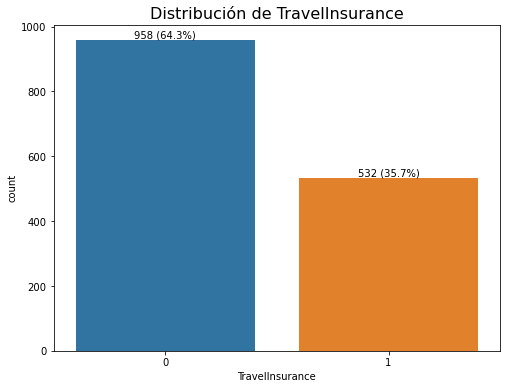

In [36]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='TravelInsurance', data=df_ti)
label_values = df_ti.TravelInsurance.value_counts().values
nor_label_values = df_ti.TravelInsurance.value_counts(normalize=True).values
lbls = [f'{p[0]} ({round(p[1]*100, 2)}%)' for p in zip(label_values, nor_label_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)
plt.title('Distribución de TravelInsurance', fontsize=16)
plt.show()

Tenemos un 35.7% de clientes que no han adquirido el seguro de viajes de esta empresa.

---

### Correlación

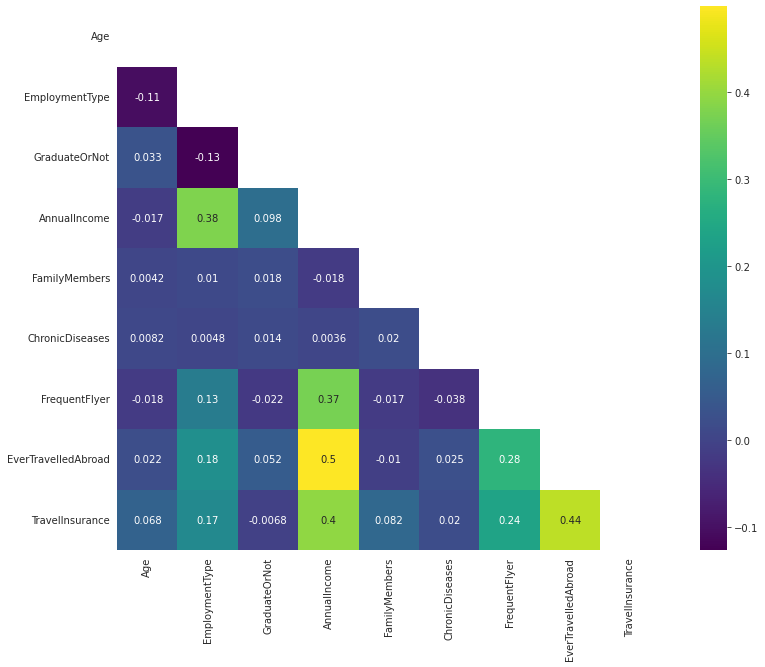

In [37]:
corr = df_ti.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 10))
    ax = sns.heatmap(corr, annot=True, mask=mask, square=True, cmap='viridis')

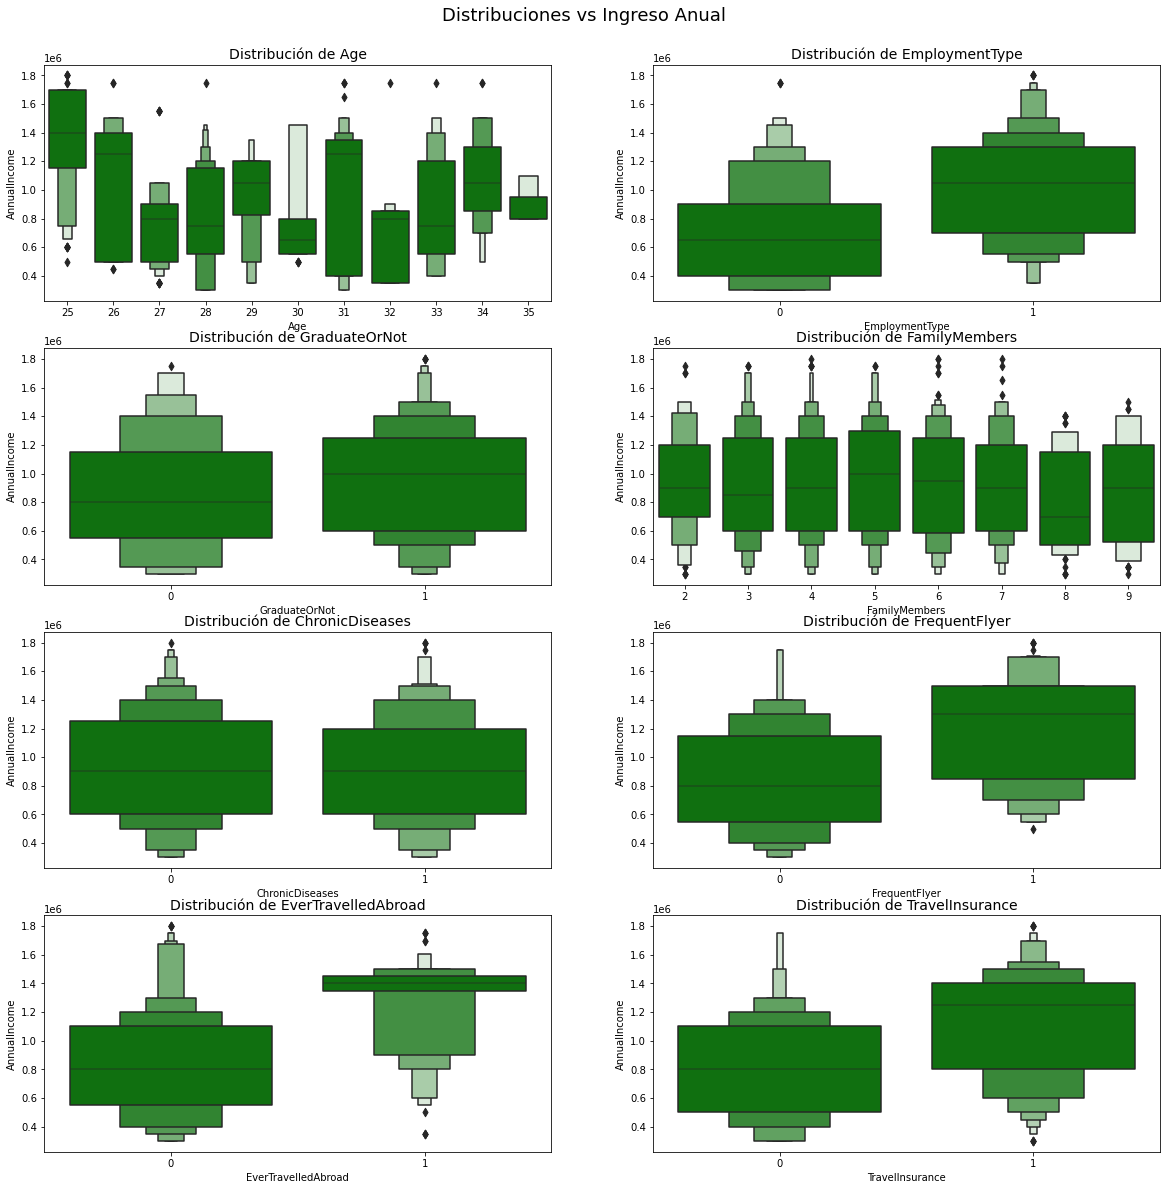

In [38]:
cols = df_ti.drop(columns=['AnnualIncome']).columns.values

n_rows = math.ceil(len(cols)/2)
n_cols = 2
count = 0
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20,20))
for i in cols:
    row = math.floor(count / n_cols)
    col = count % n_cols
    axes = ax[row, col]
    sns.boxenplot(data=df_ti, x=i, y='AnnualIncome', color='green', ax=axes)
    axes.set_title(f'Distribución de {i}', fontsize=14)
    count += 1
fig.suptitle('Distribuciones vs Ingreso Anual', fontsize=18, y=0.92)
plt.show()

Con el gráfico de correlatividad podemos deducir que:
* El grado de correlatividad entre las variables no superan el 50%.
* Podemos remarcar que el ingreso anual influye bastante en variables como "Viajero Frecuente", que el cliente tome viajes al exterior, y que pueda pagarse el seguro de viaje. Para reforzar nuestra intuición, realizamos el bokenplot y efectivamente. Podemos notar que cuanto mayor es el ingreso, más posibilidades de que estas variables tomen el valor 1, es decir, si son frecuentes, si pueden viajar al exterior y si tienen más posibilidades de pagarse un seguro de viajes.
* También remarcamos que aquellos con mayor ingreso anual tienden a ser de sectores privados o ser autónomos.
* La última variable que vamos a tomar en consideración, es la variable de viajes al exterior, la cual resalta entre las demás correlacionarse con la variable de seguro de vida. Podemos intuir que aquellas personas con más posibilidades de viajar al exterior, son las que tienden a sacar un seguro de vida.

---

### Separación de X e Y

In [39]:
X_train = df_ti.iloc[:,:-1].values
y_train = df_ti.iloc[:,-1].values.reshape(-1,1)

X_test = test_df_ti.values

print(X_train.shape, y_train.shape)
print(X_test.shape)

(1490, 8) (1490, 1)
(497, 8)


---

## Balanceo de datos

Las técnicas de aprendizaje automático suelen fallar o dar un rendimiento engañoso en conjuntos de datos de clasificación con una distribución de clases desequilibrada.

La razón es que muchos algoritmos de aprendizaje automático están diseñados para operar en datos de clasificación con un número igual de observaciones para cada clase. Cuando este no es el caso, los algoritmos pueden aprender que muy pocos ejemplos no son importantes y pueden ser ignorados para conseguir un buen rendimiento.

El muestreo de datos ofrece un conjunto de técnicas que transforman un conjunto de datos de entrenamiento para equilibrar o mejorar la distribución de las clases. Una vez equilibrada, los algoritmos estándar de aprendizaje automático pueden entrenarse directamente en el conjunto de datos transformado sin ninguna modificación. Esto permite abordar el reto de la clasificación desequilibrada, incluso con distribuciones de clase muy desequilibradas, con un método de preparación de datos.

* Fuente: [link](https://machinelearningmastery.com/data-sampling-methods-for-imbalanced-classification/)
* Fuente SMOTE: [link](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)

In [40]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(X_train_resampled.shape, y_train_resampled.shape)

(1916, 8) (1916,)


In [41]:
unique, counts = np.unique(y_train_resampled, return_counts=True)
print(unique, counts)

[0 1] [958 958]


---

## Implementación RandomForestClassifier

**Aclaración**: En nuestro trabajo práctico, se buscan los hiperparámetros con un GridSearchCV. Aquí simplemente se implementa el mejor modelo (Best Model)

In [42]:
rfc_model = RandomForestClassifier(criterion='entropy', max_depth=16, max_features='log2', n_estimators=80, random_state=15)
rfc_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(criterion='entropy', max_depth=16, max_features='log2',
                       n_estimators=80, random_state=15)

In [43]:
rfc_model.score(X_train_resampled, y_train_resampled)

0.918580375782881

In [45]:
y_train_pred_rfc = rfc_model.predict(X_train)

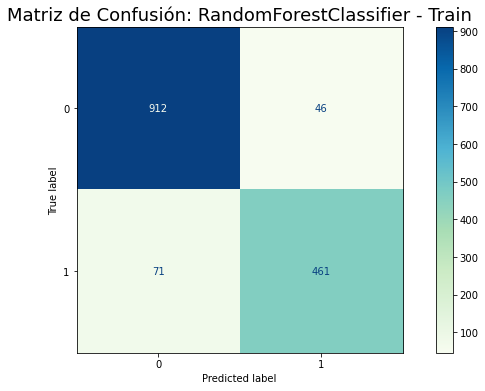

In [47]:
cm_train = confusion_matrix(y_train, y_train_pred_rfc)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=rfc_model.classes_)
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('Matriz de Confusión: RandomForestClassifier - Train', fontsize=18)
disp.plot(cmap='GnBu', ax=ax)
plt.show()

In [48]:
# Evaluate val
text = "RandomForestClassifier - Reporte de clasificación del conjunto de entrenamiento" 
print(len(text)*"=")
print(text)
print(len(text)*"=")

cr = classification_report(y_train, y_train_pred_rfc)
print(cr)

RandomForestClassifier - Reporte de clasificación del conjunto de entrenamiento
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       958
           1       0.91      0.87      0.89       532

    accuracy                           0.92      1490
   macro avg       0.92      0.91      0.91      1490
weighted avg       0.92      0.92      0.92      1490



In [50]:
y_test_pred_final_rfc = rfc_model.predict(X_test)

In [51]:
test_id = test_df["Customer"]
test_pred = y_test_pred_final_rfc

submission = pd.DataFrame(list(zip(test_id, test_pred)), columns=["Customer", "TravelInsurance"])
submission.to_csv("./data_pred/travel_insurance_submission_RANDOMFORESTCLASSIFIER.csv", header=True, index=False)

---

## Implementación AutoPyTorch

In [60]:
# initialise Auto-PyTorch api
api = TabularClassificationTask()

# Search for an ensemble of machine learning algorithms
api.search(
    X_train=X_train_resampled,
    y_train=y_train_resampled.reshape(-1,1),
    X_test=X_train,
    y_test=y_train,
    optimize_metric='f1',
    total_walltime_limit=300,
    func_eval_time_limit_secs=50
)

[WARNING] [2021-12-09 23:42:35,919:Client-Validation] AutoPyTorch previously received features of type <class 'numpy.ndarray'> yet the current features have type <class 'pandas.core.frame.DataFrame'>. Changing the dtype of inputs to an estimator might cause problems
[WARNING] [2021-12-09 23:42:35,943:Client-Validation] AutoPyTorch previously received features of type <class 'numpy.ndarray'> yet the current features have type <class 'pandas.core.frame.DataFrame'>. Changing the dtype of inputs to an estimator might cause problems
[ERROR] [2021-12-09 23:42:45,297:Client-AutoPyTorch:af69addb-5949-11ec-826c-79b6f25119f8:1] Traditional prediction for catboost failed with run state StatusType.CRASHED.
Additional info:
error: Result queue is empty
exit_status: <class 'pynisher.limit_function_call.AnythingException'>
subprocess_stdout: 
subprocess_stderr: 
exitcode: -11
configuration_origin: traditional


In [64]:
# Calculate test F1-Score
y_pred_autopytorch = api.predict(X_train)
score = api.score(y_pred_autopytorch, y_train)
print("F1-score", score)

F1-score {'f1': 0.8348623853211008}


In [66]:
print(api.show_models())

|    | Preprocessing   | Estimator   |   Weight |
|---:|:----------------|:------------|---------:|
|  0 | None            | LGBMLearner |     0.66 |
|  1 | None            | RFLearner   |     0.16 |
|  2 | None            | ETLearner   |     0.08 |
|  3 | None            | SVMLearner  |     0.08 |
|  4 | None            | KNNLearner  |     0.02 |


In [67]:
# Print statistics from search
print(api.sprint_statistics())

autoPyTorch results:
	Dataset name: af69addb-5949-11ec-826c-79b6f25119f8
	Optimisation Metric: f1
	Best validation score: 0.771004942339374
	Number of target algorithm runs: 28
	Number of successful target algorithm runs: 7
	Number of crashed target algorithm runs: 20
	Number of target algorithms that exceeded the time limit: 1
	Number of target algorithms that exceeded the memory limit: 0



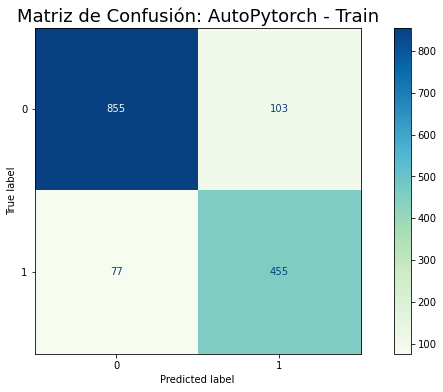

In [70]:
cm_train = confusion_matrix(y_train, y_pred_autopytorch)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=rfc_model.classes_)
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('Matriz de Confusión: AutoPytorch - Train', fontsize=18)
disp.plot(cmap='GnBu', ax=ax)
plt.show()

In [72]:
# Evaluate val
text = "AutoPyTorch - Reporte de clasificación del conjunto de entrenamiento" 
print(len(text)*"=")
print(text)
print(len(text)*"=")

cr = classification_report(y_train, y_pred_autopytorch)
print(cr)

AutoPyTorch - Reporte de clasificación del conjunto de entrenamiento
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       958
           1       0.82      0.86      0.83       532

    accuracy                           0.88      1490
   macro avg       0.87      0.87      0.87      1490
weighted avg       0.88      0.88      0.88      1490



In [73]:
y_test_pred_final_autopytorch = api.predict(X_test)

In [74]:
test_id = test_df["Customer"]
test_pred = y_test_pred_final_autopytorch

submission = pd.DataFrame(list(zip(test_id, test_pred)), columns=["Customer", "TravelInsurance"])
submission.to_csv("./data_pred/travel_insurance_submission_AUTOPYTORCH.csv", header=True, index=False)

---

# Conclusión

Como podemos observar, en la búsqueda de nuestro objetivo, se sigue obteniendo mejores resultados con el **RandomForestClassifier** con un F1-score de 89 en nuestra clase 1.

**Larga vida al RandomForest**

# **Aclaraciones**
* Puede que Autopytorch obtenga mejores resultado si se juega un poco con las variables, aunque con la poca experiencia, probamos los que aparecían en la documentación.
* Se levantó Jupyter a través de Docker ya que AutoPytorch no pudo ser instalado en Windows 10.

---

# Fuente

Link: [AutoML - AutoPytorch](https://automl.github.io/Auto-PyTorch/development/examples/20_basics/example_tabular_classification.html#sphx-glr-examples-20-basics-example-tabular-classification-py)